In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import yaml
from pandas.tseries import offsets
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, NullLocator)
import matplotlib.dates as mdates

In [29]:
csv_opts = {'sep': '|',
            'quotechar': '"',
            'compression': 'gzip',
            'encoding': 'utf-8'}

pogo = pd.read_csv('../input/pogo.csv.gz',
                   parse_dates=['placement_date', 'release_date'],
                   **csv_opts)

In [30]:
pogo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6559 entries, 0 to 6558
Data columns (total 23 columns):
gender                       6559 non-null object
facility_aor                 6559 non-null object
facility                     6559 non-null object
report_type                  6559 non-null object
placement_date               6559 non-null datetime64[ns]
placement_reason             6559 non-null object
release_date                 6439 non-null datetime64[ns]
disciplinary_infraction      3066 non-null object
detailed_reason              901 non-null object
attorney_of_record           5819 non-null object
attorney_notification        5820 non-null object
detainee_request             6559 non-null object
compliance_with_detention    6488 non-null object
non_compliance_detail        8 non-null object
mental_illness               6533 non-null object
serious_medical_illness      6531 non-null object
serious_disability           6531 non-null object
smi_spi_dis_description      28

In [31]:
pogo.head()

,gender,facility_aor,facility,report_type,placement_date,placement_reason,release_date,disciplinary_infraction,detailed_reason,attorney_of_record,...,non_compliance_detail,mental_illness,serious_medical_illness,serious_disability,smi_spi_dis_description,fo_recommendation,created,days_solitary,placement_reason_type,detloc
0,Male,BUF (Buffalo),BUFFALO (BATAVIA) SERVICE PROCESSING CENTER (NY),30 Day Interval,2016-03-04,Protective Custody: Other Detainee Safety,2018-05-03,NaN,NaN,No,...,NaN,No,No,No,NaN,SHU,3/18/2016 6:18,790.0,Protective Custody,BTV
1,Male,DET (Detroit),SENECA COUNTY JAIL (OH),30 Day Interval,2016-05-26,Protective Custody: Criminal Offense (i.e. Sex...,2018-01-03,NaN,Detainee continues to demonstrate inability to...,No,...,NaN,None,No,No,NaN,FO concurs with placement. There have been no...,6/27/2016 12:24,587.0,Protective Custody,SENECOH
2,Male,SND (San Diego),OTAY MESA DETENTION CENTER (SAN DIEGO CDF) (CA),30 Day Interval,2016-06-18,Protective Custody: Other Detainee Safety,2017-12-04,NaN,"PC- Active 6,(b)7c Gang member. Unsafe in GP",No,...,NaN,None,No,No,NaN,The Field Office Director Designee is actively...,5/9/2016 9:25,534.0,Protective Custody,CCASDCA
3,Male,SND (San Diego),IMPERIAL REGIONAL DETENTION FACILITY (CA),30 Day Interval,2016-01-02,Protective Custody: Gang Status (Protective Cu...,2017-04-12,NaN,NaN,No,...,NaN,No,No,No,NaN,NaN,1/22/2016 16:58,466.0,Protective Custody,IRADFCA
4,Female,LOS (Los Angeles),ADELANTO ICE PROCESSING CENTER (CA),30 Day Interval,2016-09-13,Protective Custody: Other Detainee Safety,2017-12-11,NaN,"On September 13, 2016, 6,(b)7c was placed in s...",NaN,...,NaN,Mental Illness,No,No,"Per facility psychologist, 6,(b)7c was diagnos...",Alternative housing arrangements are being exp...,9/27/2016 9:19,454.0,Protective Custody,ADLNTCA


In [32]:
pogo['record_id'] = range(len(pogo))

In [33]:
pogo.columns

Index(['gender', 'facility_aor', 'facility', 'report_type', 'placement_date',
       'placement_reason', 'release_date', 'disciplinary_infraction',
       'detailed_reason', 'attorney_of_record', 'attorney_notification',
       'detainee_request', 'compliance_with_detention',
       'non_compliance_detail', 'mental_illness', 'serious_medical_illness',
       'serious_disability', 'smi_spi_dis_description', 'fo_recommendation',
       'created', 'days_solitary', 'placement_reason_type', 'detloc',
       'record_id'],
      dtype='object')

In [34]:
assert len(pogo[pogo['release_date'] < pogo['placement_date']]) == 0

In [35]:
len(pogo['facility'].unique())

99

POGO dataset has different date range than UWCHR, ICIJ datasets

In [36]:
pogo['placement_date'].describe()

count                    6559
unique                    851
top       2016-11-03 00:00:00
freq                       35
first     2016-01-01 00:00:00
last      2018-05-04 00:00:00
Name: placement_date, dtype: object

In [37]:
pogo['release_date'].describe()

count                    6439
unique                    844
top       2016-11-04 00:00:00
freq                       28
first     2016-01-05 00:00:00
last      2018-06-08 00:00:00
Name: release_date, dtype: object

In [38]:
nwdc_str = 'TACOMA ICE PROCESSING CENTER (NORTHWEST DET CTR) (WA)'

In [39]:
pogo_nwdc = pogo[pogo['facility'] == nwdc_str]

In [40]:
pogo_nwdc['days_solitary'].describe()

count    139.000000
mean      69.884892
std       72.575506
min        2.000000
25%       22.500000
50%       42.000000
75%       94.500000
max      391.000000
Name: days_solitary, dtype: float64

In [41]:
pogo['days_solitary'].describe()

count    6439.000000
mean       30.195683
std        41.259680
min         0.000000
25%         9.000000
50%        20.000000
75%        32.000000
max       790.000000
Name: days_solitary, dtype: float64

In [42]:
avg_days = pogo.groupby('facility')['days_solitary'].mean().sort_values(ascending=False)
avg_days.name = 'mean_days_solitary'
avg_days = avg_days.reset_index()
avg_days['rank'] = avg_days.index + 1
avg_days.set_index('rank', inplace=True)
avg_days.head(10)

,facility,mean_days_solitary
rank,,
1,BUTLER COUNTY JAIL (KS),74.000000
2,TACOMA ICE PROCESSING CENTER (NORTHWEST DET CT...,69.884892
3,UTAH COUNTY JAIL (UT),67.111111
4,YUBA COUNTY JAIL (CA),65.431034
5,NORTHERN OREGON CORRECTIONAL FACILITY (OR),60.750000
6,BOONE COUNTY JAIL (KY),57.000000
7,WORCESTER COUNTY JAIL (MD),56.000000
8,ATLANTA CITY DETENTION CENTER (GA),53.942857
9,RIO COSUMNES CORR. CENTER (CA),52.650000


In [43]:
placement_count = pogo.groupby('facility')['placement_date'].count().sort_values(ascending=False)
placement_count.name = 'solitary_placements'
placement_count = placement_count.reset_index()
placement_count['rank'] = placement_count.index + 1
placement_count.set_index('rank', inplace=True)
placement_count.head(15)

,facility,solitary_placements
rank,,
1,ADELANTO ICE PROCESSING CENTER (CA),1191
2,STEWART DETENTION CENTER (GA),614
3,OTAY MESA DETENTION CENTER (SAN DIEGO CDF) (CA),308
4,SOUTH TEXAS ICE PROCESSING CENTER (TX),290
5,HOUSTON CONTRACT DETENTION FACILITY (TX),283
6,YORK COUNTY PRISON (PA),264
7,ELOY FEDERAL CONTRACT FACILITY (AZ),258
8,LASALLE ICE PROCESSING CENTER (JENA) (LA),244
9,BUFFALO (BATAVIA) SERVICE PROCESSING CENTER (NY),238


In [44]:
placement_count[placement_count['facility'] == 'BUTLER COUNTY JAIL (KS)']

,facility,solitary_placements
rank,,
79,BUTLER COUNTY JAIL (KS),2


In [45]:
pogo['placement_reason'].unique()

array(['Protective Custody: Other Detainee Safety',
       'Protective Custody: Criminal Offense (i.e. Sex Offender)',
       'Protective Custody: Gang Status (Protective Custody Only)',
       'Facility Security Threat: Violent or Disruptive Behavior',
       'Disciplinary', 'Pending Investigation of Disciplinary Violation',
       'Facility Security Threat: Other',
       'Protective Custody: Lesbian, Gay, Bisexual, Transgender (LGBT)',
       'Facility Security Threat: Gang Member Status (Not Protective Custody)',
       'Hunger Strike', 'Mental Illness', 'Other',
       'Facility Security Threat: Due to Seriousness of Criminal Conviction',
       'Mental Illness: Observation', 'Medical: Disabled or Infirm',
       'Protective Custody: Victim of Sexual Assault',
       'Medical: Observation', 'Suicide Risk Placement',
       'Protective Custody: Special Vulnerability Other',
       'Medical: Tuberculosis', 'Medical: Segregation Unit',
       'Medical: Other', 'Medical: Other Infecti

In [46]:
placement_counts = pogo['placement_reason'].value_counts(dropna=False)
placement_mean_days = pogo.groupby(['placement_reason'])['days_solitary'].mean()
placements = pd.concat([placement_counts, placement_mean_days], axis=1, sort=False)
placements = placements.rename({'placement_reason': 'Total placements',
    'days_solitary': 'Avg. solitary length'}, axis=1)
placements.index.name = 'Solitary Placement Reason'
placements

,Total placements,Avg. solitary length
Solitary Placement Reason,,
Disciplinary,2824,23.713878
Protective Custody: Other Detainee Safety,1370,52.373089
Pending Investigation of Disciplinary Violation,369,7.265583
Facility Security Threat: Violent or Disruptive Behavior,365,46.377841
Suicide Risk Placement,284,5.038732
Hunger Strike,225,6.395556
Protective Custody: Gang Status (Protective Custody Only),144,59.482014
Facility Security Threat: Other,144,47.362319
Medical: Observation,122,11.754098


In [47]:
placement_counts = pogo_nwdc['placement_reason'].value_counts(dropna=False)
placement_mean_days = pogo_nwdc.groupby(['placement_reason'])['days_solitary'].mean()
placements = pd.concat([placement_counts, placement_mean_days], axis=1, sort=False)
placements = placements.rename({'placement_reason': 'Total placements',
    'days_solitary': 'Avg. solitary length'}, axis=1)
placements.index.name = 'Solitary Placement Reason'
placements

,Total placements,Avg. solitary length
Solitary Placement Reason,,
Protective Custody: Other Detainee Safety,55,94.882353
Disciplinary,28,24.777778
Facility Security Threat: Other,26,61.434783
Facility Security Threat: Violent or Disruptive Behavior,16,64.357143
Protective Custody: Gang Status (Protective Custody Only),9,116.666667
Pending Investigation of Disciplinary Violation,4,8.000000
Protective Custody: Criminal Offense (i.e. Sex Offender),3,143.666667
Mental Illness,2,16.000000
Other,2,14.000000


In [48]:
# Comparison with UWCHR

In [49]:
uwchr = pd.read_csv('../input/uwchr.csv.gz',
                 parse_dates=['placement_date', 'release_date'],
                 **csv_opts)

In [50]:
uwchr.set_index('placement_date', inplace=True)
uwchr = uwchr.loc[str(pogo['placement_date'].min()):str(pogo['placement_date'].max())]
uwchr.reset_index(inplace=True)

In [51]:
uwchr_annual = uwchr.set_index('placement_date').groupby(pd.Grouper(freq='AS'))
uwchr_fy = uwchr.set_index('placement_date').groupby(pd.Grouper(freq='AS-OCT'))
uwchr_monthly = uwchr.set_index('placement_date').groupby(pd.Grouper(freq='M'))

pogo_annual = pogo_nwdc.set_index('placement_date').groupby(pd.Grouper(freq='AS'))
pogo_fy = pogo_nwdc.set_index('placement_date').groupby(pd.Grouper(freq='AS-OCT'))
pogo_monthly = pogo_nwdc.set_index('placement_date').groupby(pd.Grouper(freq='M'))

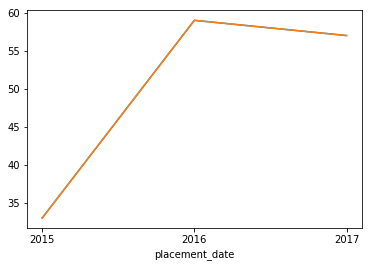

In [52]:
uwchr_fy['tracking_number'].nunique().plot()
pogo_fy['record_id'].nunique().plot()

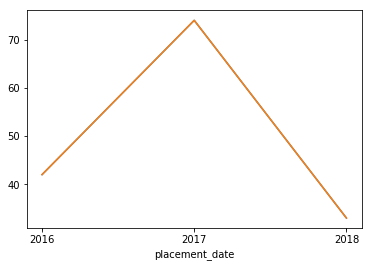

In [53]:
uwchr_annual['tracking_number'].nunique().plot()
pogo_annual['record_id'].nunique().plot()

In [54]:
uwchr_monthly_count = uwchr_monthly['tracking_number'].nunique()
uwchr_monthly.name = "UWCHR count"
pogo_monthly_count = pogo_monthly['record_id'].nunique()
pogo_monthly.name = "POGO count"
temp = pd.concat([uwchr_monthly_count, pogo_monthly_count], axis=1)

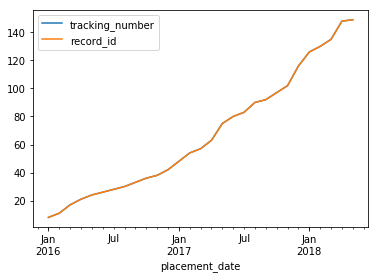

In [55]:
temp.cumsum().plot()

In [56]:
# More POGO visualizations

In [57]:
g_monthly = pogo.set_index('placement_date').groupby(pd.Grouper(freq='M'))

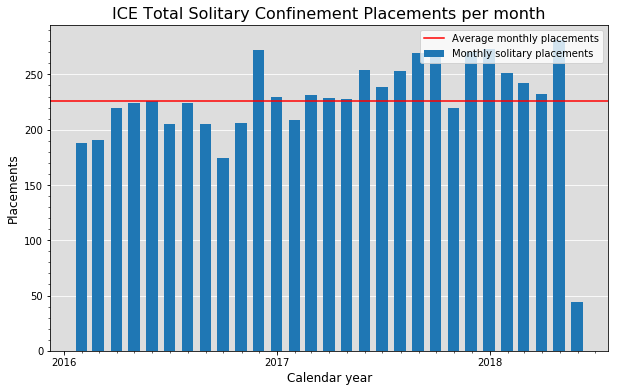

Minimum monthly solitary placements: 44
Maximum monthly solitary placements: 281 in April 2018
Overall average monthly solitary placements: 226.17241379310346


In [58]:
data = g_monthly['record_id'].nunique()

years_loc = mdates.YearLocator()
months_loc = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(10,6))
ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FFFFFF')
ax.bar(data.index, data, width=20)
ax.xaxis.set_minor_locator(months_loc)
ax.xaxis.set_major_locator(years_loc)
ax.xaxis.set_major_formatter(years_fmt)
ax.axhline(data.mean(), color='r')
ax.yaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(50))
plt.title('ICE Total Solitary Confinement Placements per month', fontsize=16)
plt.ylabel('Placements', fontsize=12)
plt.xlabel('Calendar year', fontsize=12)
plt.legend(('Average monthly placements', 'Monthly solitary placements'), loc='upper right')

plt.show()

print(f'Minimum monthly solitary placements: {data.min()}')
print(f'Maximum monthly solitary placements: {data.max()} in {data.idxmax().month_name()} {data.idxmax().year}')
print(f'Overall average monthly solitary placements: {data.mean()}')

In [87]:
pogo['days_solitary'].max()

790.0

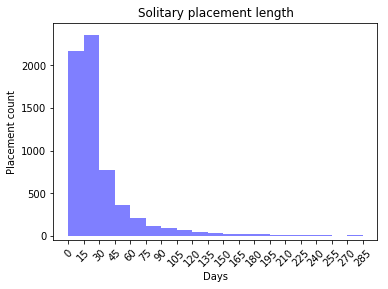

In [92]:
maximum = 300
step = 15
num_bins = np.arange(0,maximum,step)
data = pogo['days_solitary']
# the histogram of the data
n, bins, patches = plt.hist(data, num_bins, facecolor='blue', alpha=0.5)
 
plt.plot()
plt.xlabel('Days')
plt.xticks(np.arange(0, maximum, step=15), rotation=45)
plt.ylabel('Placement count')
plt.yticks(np.arange(0, 2500, step=500))
plt.ylim(-50, 2500)
plt.title('Solitary placement length')
 
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15) 
plt.show()

In [60]:
pogo.loc[:, 'log_days_solitary'] = np.log(pogo['days_solitary'])

/Users/philneff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


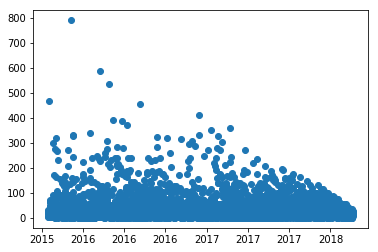

In [61]:
x=pogo.loc[:, 'placement_date'].astype(int)
y=pogo.loc[:,'days_solitary']

fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(x, y)

xticks = ax.get_xticks()
xticks_dates = [pd.to_datetime(x).year for x in xticks]
ax.set_xticklabels(xticks_dates)
plt.show()
plt.close(fig=fig)
del fig, ax

/Users/philneff/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


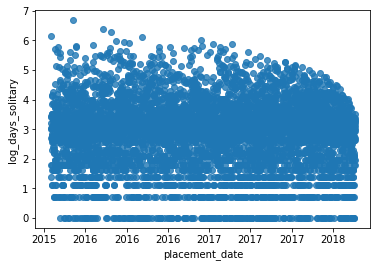

In [62]:
x=pogo.loc[:, 'placement_date'].astype(int)
y=pogo.loc[:,'log_days_solitary']

fig = plt.figure()
ax = fig.add_subplot(111)
sns.regplot(x, y)

xticks = ax.get_xticks()
xticks_dates = [pd.to_datetime(x).year for x in xticks]
ax.set_xticklabels(xticks_dates);

In [63]:
pogo['placement_year'] = pogo['placement_date'].map(lambda x: x.year)

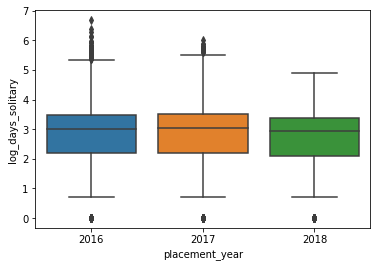

In [64]:
ax = sns.boxplot(data=pogo, x="placement_year", y="log_days_solitary")

In [65]:
pogo.set_index('placement_date').resample('AS')['days_solitary'].mean()

placement_date
2016-01-01    32.938791
2017-01-01    30.298318
2018-01-01    22.562955
Freq: AS-JAN, Name: days_solitary, dtype: float64

In [66]:
null_end = pogo['release_date'].isnull()

In [67]:
pogo.loc[null_end,'release_date'] = pogo['release_date'].max()

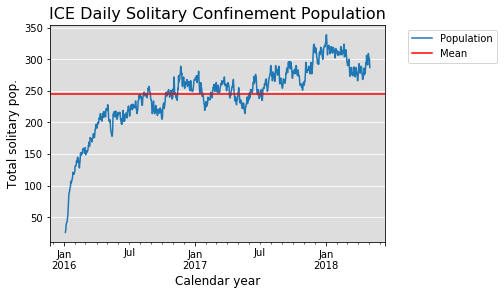

In [68]:
min_date = pogo['release_date'].min()
max_date = pogo['placement_date'].max()
timeline = pd.date_range(min_date, max_date, freq='D')
years = timeline.year.unique()

counts = pd.Series(index=timeline)
for day in timeline:
    in_range = pogo[(pogo['placement_date'] <= day) & (pogo['release_date'] >= day)]
    counts[day] = len(in_range)

fig, ax = plt.subplots()
fig.figsize=(10,8)

ax = counts.plot();
ax.axhline(counts.mean(), color='r')
ax.set_facecolor('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(color='#FFFFFF')
plt.title('ICE Daily Solitary Confinement Population', fontsize=16)
plt.xlabel('Calendar year', fontsize=12)
plt.ylabel('Total solitary pop.', fontsize=12)
leg = ax.legend(('Population', 'Mean'), loc='upper right', bbox_to_anchor=(1.35, 1))
plt.show()
# fig.savefig('samplefigure', bbox_inches='tight')

In [69]:
pogo['placement_date'].max()

Timestamp('2018-05-04 00:00:00')

In [70]:
pogo['release_date'].max()

Timestamp('2018-06-08 00:00:00')

In [71]:
pogo['placement_date'].min()

Timestamp('2016-01-01 00:00:00')

In [72]:
# Simplify placement reasons into more general categories:
with open(f'../hand/placement-types.yaml', 'r') as yamlfile:
    placement_reason_type = yaml.load(yamlfile)

In [73]:
pogo['placement_reason_type'] = pogo['placement_reason'].replace(placement_reason_type)

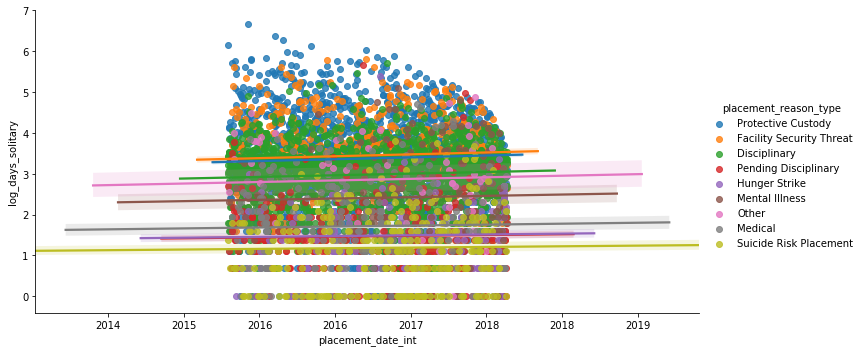

In [100]:
pogo = pogo[pogo['days_solitary'] > 0]

pogo['placement_date'] = pd.to_datetime(pogo['placement_date'])

pogo = pogo.dropna(subset=['release_date'])
pogo.loc[:,'placement_date_int'] = pogo['placement_date'].astype(int)
pogo.loc[:,'log_days_solitary'] = np.log(pogo['days_solitary'])

# x=pogo.loc[:, 'placement_date'].astype(int)
# y=pogo.loc[:,'log_days_solitary']

lm = sns.lmplot(data=pogo, x='placement_date_int', y='log_days_solitary', hue='placement_reason_type', height=5, aspect=2)

ax = lm.axes

xticks = ax[0,0].get_xticks()
xticks_dates = [pd.to_datetime(x).year for x in xticks]
ax[0,0].set_xticklabels(xticks_dates);

In [102]:
pogo.groupby('placement_reason_type')['days_solitary'].describe()

,count,mean,std,min,25%,50%,75%,max
placement_reason_type,,,,,,,,
Disciplinary,2798.0,23.756254,16.366728,1.0,15.0,21.0,29.0,303.0
Facility Security Threat,592.0,46.552365,45.025174,1.0,19.0,32.0,57.0,330.0
Hunger Strike,219.0,6.570776,15.054283,1.0,3.0,4.0,7.0,219.0
Medical,249.0,10.903614,14.848114,1.0,2.0,6.0,15.0,112.0
Mental Illness,142.0,22.471831,27.117996,1.0,5.0,12.0,29.5,164.0
Other,51.0,29.039216,27.702679,1.0,9.5,22.0,44.5,133.0
Pending Disciplinary,356.0,7.530899,19.055343,1.0,3.0,4.0,7.0,287.0
Protective Custody,1683.0,51.968509,64.084717,1.0,16.0,31.0,63.0,790.0
Suicide Risk Placement,271.0,5.280443,6.604344,1.0,1.0,3.0,6.0,45.0


In [125]:
pogo[pd.Series(pogo['placement_reason'] == 'Disciplinary') & pd.Series(pogo['days_solitary'] > 30)]

,gender,facility_aor,facility,report_type,placement_date,placement_reason,release_date,disciplinary_infraction,detailed_reason,attorney_of_record,...,smi_spi_dis_description,fo_recommendation,created,days_solitary,placement_reason_type,detloc,record_id,log_days_solitary,placement_year,placement_date_int
22,Male,DEN (Denver),DENVER CONTRACT DETENTION FACILITY (CO),30 Day Interval,2017-05-03,Disciplinary,2018-03-02,307- Refusing a Direct Order from Staff Member...,NaN,No,...,NaN,NaN,5/19/2017 16:39,303.0,Disciplinary,DENICDF,22,5.713733,2017,1493769600000000000
48,Male,LOS (Los Angeles),ADELANTO ICE PROCESSING CENTER (CA),30 Day Interval,2017-02-01,Disciplinary,2017-09-27,108,NaN,Yes,...,"Antisocial Personality D/O, Schizotypal \n",Facility Initiate for the safety and security ...,2/2/2017 14:56,238.0,Disciplinary,ADLNTCA,48,5.472271,2017,1485907200000000000
98,Male,SND (San Diego),OTAY MESA DETENTION CENTER (SAN DIEGO CDF) (CA),30 Day Interval,2016-10-05,Disciplinary,2017-03-30,101 Assault on Staff\n109 Threatening Staff wi...,NaN,No,...,NaN,Detainee finish his time.,10/20/2016 13:12,176.0,Disciplinary,CCASDCA,98,5.170484,2016,1475625600000000000
102,Female,PHO (Phoenix),ELOY FEDERAL CONTRACT FACILITY (AZ),30 Day Interval,2016-11-16,Disciplinary,2017-05-10,109; threatening a staff member,"On November 16, 2016, 6,(b)7c refused an order...",Yes,...,Unspecified Psychosis\nNo active symptoms note...,NaN,1/4/2017 16:10,175.0,Disciplinary,EAZ,102,5.164786,2016,1479254400000000000
136,Male,MIA (Miami),BAKER COUNTY SHERIFF'S OFFICE (FL),30 Day Interval,2016-07-08,Disciplinary,2016-12-09,code 104.\n,NaN,No,...,NaN,NaN,8/11/2016 14:30,154.0,Disciplinary,BAKERFL,136,5.036953,2016,1467936000000000000
148,Male,BUF (Buffalo),BUFFALO (BATAVIA) SERVICE PROCESSING CENTER (NY),30 Day Interval,2016-08-28,Disciplinary,2017-01-20,"Code 108 (Assaulting Staff), 307 (refusing an ...","12/22/16: While in PC, detainee began arguing ...",No,...,GENERALIZED ANXIETY & INTERMITTENT EXPLOSIVE D...,Disc Seg.,9/12/2016 15:23,145.0,Disciplinary,BTV,148,4.976734,2016,1472342400000000000
175,Male,CHI (Chicago),PULASKI COUNTY JAIL (IL),30 Day Interval,2016-03-03,Disciplinary,2016-07-15,"FC; 101 x 2 Assaulting any Person, (Sexual Ass...","FC; 101 x 2 Assaulting any Person, (Sexual Ass...",No,...,"Hx Auditory Hallucinations, Bi-Polar Disorder,...",NaN,3/8/2016 21:02,134.0,Disciplinary,PULASIL,175,4.897840,2016,1456963200000000000
191,Male,ATL (Atlanta),STEWART DETENTION CENTER (GA),30 Day Interval,2017-02-13,Disciplinary,2017-06-21,Code: 220 Being found guilty of any combinatio...,NaN,Yes,...,NaN,NaN,3/1/2017 17:11,128.0,Disciplinary,STWRTGA,191,4.852030,2017,1486944000000000000
194,Female,HOU (Houston),HOUSTON CONTRACT DETENTION FACILITY (TX),30 Day Interval,2017-10-31,Disciplinary,2018-03-07,299\n223\n108,NaN,No,...,NaN,Yes,11/17/2017 15:28,127.0,Disciplinary,HOUICDF,194,4.844187,2017,1509408000000000000
220,Male,BUF (Buffalo),BUFFALO (BATAVIA) SERVICE PROCESSING CENTER (NY),30 Day Interval,2017-02-24,Disciplinary,2017-06-23,108-Assault on staff,NaN,No,...,Adjustment Disorder,NaN,3/17/2017 13:00,119.0,Disciplinary,BTV,220,4.779123,2017,1487894400000000000


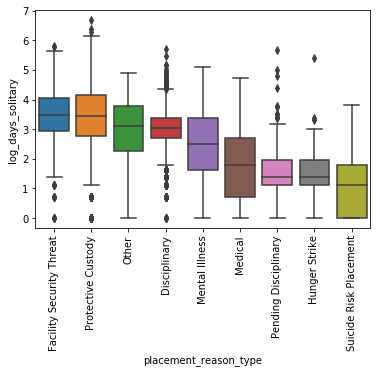

In [75]:
order = pogo.groupby(by=["placement_reason_type"])["log_days_solitary"].median().sort_values(ascending=False).index
ax = sns.boxplot(data=pogo, x="placement_reason_type", y="log_days_solitary", order=order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);